### Import Libraries using Jupyter Notebook

In [1]:
pip install scikit-image

Note: you may need to restart the kernel to use updated packages.


In [20]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os


## Get a photo

In [21]:
input_img = cv2.imread('C:\\Users\\Mayar El-Mallah\\Downloads\\henry-lorenzatto-wQjjYp8_a0Y-unsplash.jpg')
#Shape
input_img.shape

(3456, 5184, 3)

# Plotting"

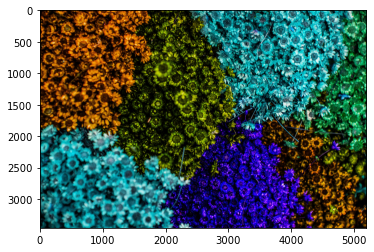

In [22]:
plt.imshow(input_img)

# Fixation from BGR to RGB

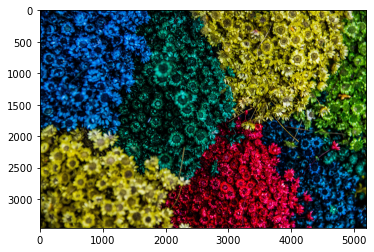

In [23]:
fixed_img = cv2.cvtColor(input_img, cv2.COLOR_BGR2RGB) #Switch from BGR to RGB
plt.imshow(fixed_img)

# Conversion to grayscale

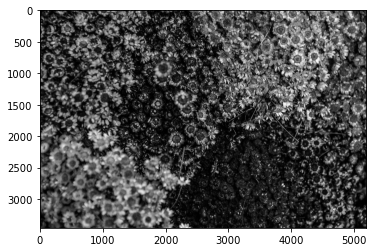

In [24]:
gray_imj = cv2.cvtColor(fixed_img, cv2.COLOR_BGR2GRAY) #coverted to 3D matrix  RGB to gray 
plt.imshow(gray_imj, cmap="gray")

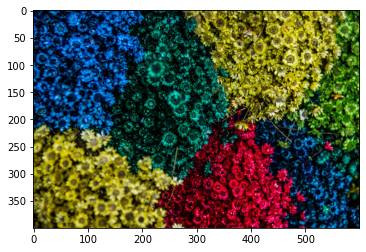

In [25]:
#to lessen the pixels which’ll reduce the time needed to extract the colors from the image
resized_imj = cv2.resize(fixed_img, [600,400])
plt.imshow(resized_imj)

In [26]:
def rgb_to_hex(color):
    #the hex values using the {:X} formatter that automatically converts decimal values to hex values.
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

# Kmeans to cluster depending on the no. of colors & pie chart of colors

In [29]:
def get_colors(image, number_of_colors):
    #reshape the img as kmeans accept 2D
    image = image.reshape(image.shape[0]*image.shape[1], 3)
    
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(image)
    #count all the labels
    counts = Counter(labels)
    # sort to ensure correct color percentage
    counts = dict(sorted(counts.items()))
    
    center_colors = clf.cluster_centers_
    # We get ordered colors by iterating through the keys
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [rgb_to_hex(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]

   
    plt.figure(figsize = (8, 6))
    plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)
    
    return rgb_colors

[array([67.10094799, 75.23315398, 11.36484755]),
 array([ 4.19852333, 43.75450321, 57.00751066]),
 array([  6.69702074,  87.88583009, 116.18344036]),
 array([209.43050292,   9.81020178,  61.3184472 ]),
 array([177.92305982, 174.34725372,  29.19568601]),
 array([  7.48571608, 129.2611289 , 193.85069379]),
 array([ 8.61129776, 11.39592156, 10.87052113]),
 array([103.11402918,   3.42409278,  15.22648709]),
 array([121.13538474, 123.55725851,  22.59565354]),
 array([200.74499025, 202.49512325, 123.04158539])]

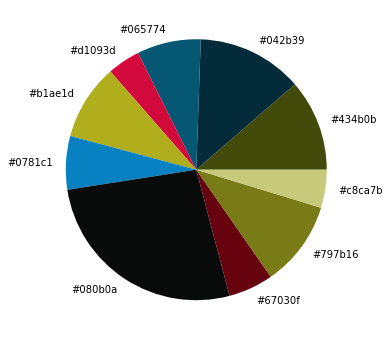

In [30]:
get_colors(resized_imj, 10)